In [ ]:
# Load modules
%pylab inline
from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
import matplotlib.pyplot as plt # to generate plots
from mpl_toolkits.basemap import Basemap # plot on map projections
from os.path import expanduser
home = expanduser("~") # Get users home directory
import os # operating system interface
import scipy as sp
import xarray as xr
from xarray.ufuncs import square, sqrt
import scipy.interpolate
import scipy.ndimage
import seawater as sw


In [14]:
#extract the MOM model grid info - 50 and 75 vertical levels
vgrid_file ='/g/data1/v45/pas561/mom/archive/gfdl_nyf_1080/ocean.ncra501-520.nc'

# Extract the grid variables
nc = Dataset(vgrid_file, mode='r') # file handle, open in read only mode
st_ocean = nc.variables['st_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
yu_ocean = nc.variables['yu_ocean'][:]
xt_ocean = nc.variables['xt_ocean'][:]
xu_ocean = nc.variables['xt_ocean'][:]
geolon_t = nc.variables['geolon_t'][:]
geolat_t = nc.variables['geolat_t'][:]
nc.close() # close the file
print yt_ocean.shape
print geolon_t.shape


(1080,)
(1080, 1440)


In [9]:
rho=sw.pden(30,30,100,0)
print rho

1017.99120054


In [ ]:
#resize st_ocean to 50x1080x1440
#st_grid=np.resize(st_ocean,(50,1080,1440))
#print st_grid.shape
#print st_grid[:,1,1]
st_grid=np.tile(st_ocean,1080*1440).reshape(1440,1080,50).

#st_grid=np.zeros((50,1080,1440))
print st_grid.shape
print st_grid[100,100,:]

st_grid=np.transpose(st_grid)
print st_grid.shape
print st_grid[:,200,200]


In [48]:
#this method loses the land/sea mask
PIDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/'

Ocean_File = os.path.join(PIDir,'output*/ocean_month_*7.nc')
print Ocean_File
ff=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff.temp.shape

/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output*/ocean_month_*7.nc
(50, 50, 1080, 1440)


In [49]:
#rho0=np.zeros((50,50,1080,1440))    
for yr in range(1978,2021,1):
    print yr, yr-1972
    rho0=sw.pden(ff.salt[yr-1972,:,:,:].load(),ff.temp[yr-1972,:,:,:].load(),st_grid,0)
    print rho0[0:5,500,500]
    
    fn='sw_potrho0_'+np.str(yr)+'.npy'
    of=os.path.join(PIDir,'sw_potrho0',fn)
    print of
    a=np.save(of,rho0)
    

1978 6
[ 1022.89722501  1022.9030029   1022.91757416  1022.93463895  1022.95919641]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1978.npy
1979 7
[ 1022.89471221  1022.90049129  1022.91380119  1022.93337492  1022.96293419]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1979.npy
1980 8
[ 1022.89219894  1022.90049129  1022.9112917   1022.9283624   1022.95919641]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1980.npy
1981 9
[ 1022.90228021  1022.9093221   1022.92012075  1022.93718897  1022.96551735]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1981.npy
1982 10
[ 1022.88214136  1022.88792646  1022.90251301  1022.91959583  1022.94794758]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1982.npy
1983 11
[ 1022.8985315   1022.9068259   1022.92013898  1022.93721041  1022.96554394]
/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/sw_potrho0/sw_potrho0_1983.npy
1984 12
[ 1022

In [52]:
CNTRLDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'

Ocean_File = os.path.join(CNTRLDir,'Tdim_output*/ocean__*7.nc')
print Ocean_File
ff2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print ff2.temp.shape
 

/g/data1/v45/pas561/mom/archive/wombat_jun16z/Tdim_output*/ocean__*7.nc
(9, 50, 1080, 1440)


In [53]:
for yr in range(1972,1981,1):
    print yr, yr-1972
    rho0=sw.pden(ff2.salt[yr-1972,:,:,:].load(),ff2.temp[yr-1972,:,:,:].load(),st_grid,0)
    print rho0[0:5,500,500]
    
    fn='sw_potrho0_'+np.str(yr)+'.npy'
    of=os.path.join(CNTRLDir,'sw_potrho0',fn)
    print of
    a=np.save(of,rho0)


1972 0
[ 1022.87639872  1022.88429231  1022.89789037  1022.91795336  1022.94808771]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1972.npy
1973 1
[ 1022.87801272  1022.88559884  1022.89765837  1022.91474676  1022.941821  ]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1973.npy
1974 2
[ 1022.86684442  1022.87425042  1022.88719517  1022.90608294  1022.93425196]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1974.npy
1975 3
[ 1022.87298779  1022.87994713  1022.89080925  1022.90667027  1022.93131625]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1975.npy
1976 4
[ 1022.88830051  1022.8964063   1022.90962734  1022.9290768   1022.95642177]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1976.npy
1977 5
[ 1022.87277907  1022.88075821  1022.89310388  1022.91212272  1022.9428903 ]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_1977.npy
1978 6
[ 1022.86685536  1022.87474

In [60]:
CNTRLDir = '/g/data1/v45/pas561/mom/archive/wombat_jun16z/'

Ocean_File = os.path.join(CNTRLDir,'output*/ocean__*7.nc')
print Ocean_File
ff2=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='Time',decode_times=False)
print ff2.temp.shape
 

for yr in range(2020,2021,1):
    print yr, yr-1981
    rho0=sw.pden(ff2.salt[yr-1981,:,:,:].load(),ff2.temp[yr-1981,:,:,:].load(),st_grid,0)
    print rho0[0:5,500,500]
    
    fn='sw_potrho0_'+np.str(yr)+'.npy'
    of=os.path.join(CNTRLDir,'sw_potrho0',fn)
    print of
    a=np.save(of,rho0)



/g/data1/v45/pas561/mom/archive/wombat_jun16z/output*/ocean__*7.nc
(40, 50, 1080, 1440)
2020 39
[ 1022.87656562  1022.88433577  1022.89701579  1022.91544103  1022.94180281]
/g/data1/v45/pas561/mom/archive/wombat_jun16z/sw_potrho0/sw_potrho0_2020.npy


(1, 1080, 1440)


[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


[  0  20  40  60  80 100 120 140 160 180]


Text(0,0.5,u'Transport (Sv)')

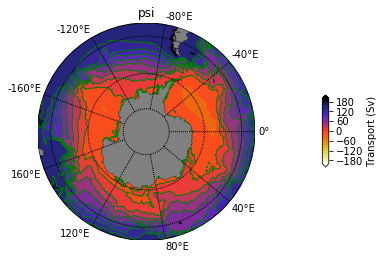

In [5]:
#plot ACC transport
levels = np.linspace(-200,200,21)
print levels

plt.subplot(1,1,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,pi_psi[0,:,:], cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
clev3 = np.arange(0,200,20)
print clev3
map.contour(X,Y,pi_psi[0,:,:],levels=clev3,colors='g',linewidths=1)
plt.title('psi')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Transport (Sv)')

In [6]:
#now find DP transport to subtract for the NAtl psi - see Rong

# do psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print j1, i1, i2

pi_dp = pi_psi[:,0:j1,i1:i2]
pi_dp_bar = np.mean(pi_dp,2)
pi_dp_ts = np.max(pi_dp_bar,1)
print pi_dp_ts[0]

[239] [843] [851]
<xarray.DataArray 'tx_trans' ()>
array(143.76276176418446)
Coordinates:
    Time     float64 6.223e+04


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/xarray/core/indexing.py:305: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  return None if value is None else operator.index(value)


Text(0.5,1,u'Control')

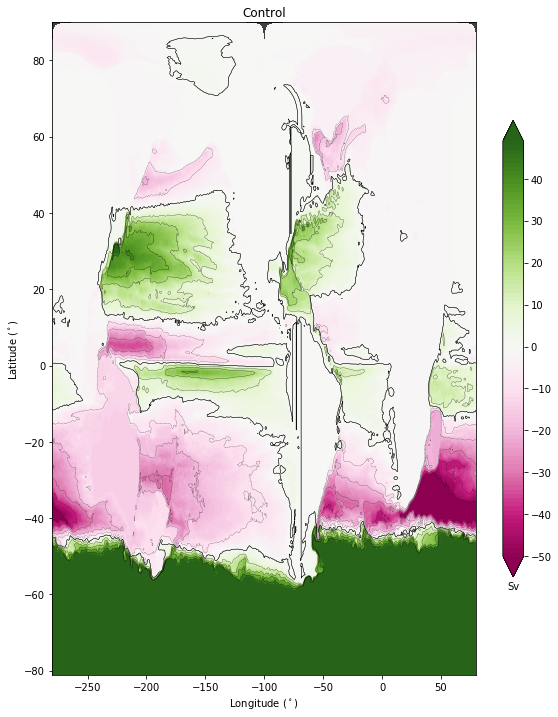

In [7]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-50,50,1)
clev2 = np.arange(-50,50,10)

t1=26
t2=30
#subtract the DP transport
#plt.subplot(211)
plt.gca().patch.set_color('.25')
plt.contourf(geolon_t,geolat_t,-pi_psi[0,:,:]+pi_dp_ts[0],cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(geolon_t,geolat_t,-pi_psi[0,:,:]+pi_dp_ts[0],levels=clev2,colors='k',linewidths=0.25)
plt.contour(geolon_t,geolat_t,-pi_psi[0,:,:]+pi_dp_ts[0],levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
#plt.xlim([-75,85])
plt.title('Control')

In [8]:
#Alternate using numpy that maintains land/sea mask
#nc = Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/wombat_jun16z_pi.tx_trans.2020.nc', mode='r') # file handle, open in read only mode
nc = Dataset('/g/data1/v45/pas561/mom/archive/wombat_jun16z_PI/output1971/ocean_month_1970_07.nc', mode='r') # file handle, open in read only mode
xt_ocean = nc.variables['xu_ocean'][:]
yt_ocean = nc.variables['yt_ocean'][:]
st_ocean = nc.variables['st_ocean'][:]
cntrl_tx_trans = nc.variables['tx_trans'][:,:,:,:]
nc.close() # close the file

print cntrl_tx_trans.shape
cntrl_psi_a=np.ma.sum(cntrl_tx_trans[0,:,:,:],axis=0)
print cntrl_psi_a.shape
cntrl_psi=np.ma.cumsum(cntrl_psi_a[:,:],axis=0)
print cntrl_psi.shape
#Doesn't this fail in the tripolar region? Yeah, but apparently it doesn't matter


(1, 50, 1080, 1440)
(1080, 1440)
(1080, 1440)


In [9]:
#now find DP transport to subtract for the NAtl psi - see Rong

# do psi max between lon 67-69S
i1=np.argwhere(xt_ocean<-69)
i2=np.argwhere(xt_ocean<-67)
i1=i1[-1]
i2=i2[-1]

j1=np.argwhere(yt_ocean<-54)
j1=j1[-1]

print j1, i1, i2

cntrl_dp = cntrl_psi[0:j1,i1:i2]
cntrl_dp_bar = np.mean(cntrl_dp,1)
cntrl_dp_ts = np.max(cntrl_dp_bar,0)
print cntrl_dp_ts

[239] [842] [850]
143.763346354


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout = self.data[indx]
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/numpy/ma/core.py:3213: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  dout._mask = _mask[indx]


[-200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.
   40.   60.   80.  100.  120.  140.  160.  180.  200.]
[  0  20  40  60  80 100 120 140 160 180]


Text(0,0.5,u'Transport (Sv)')

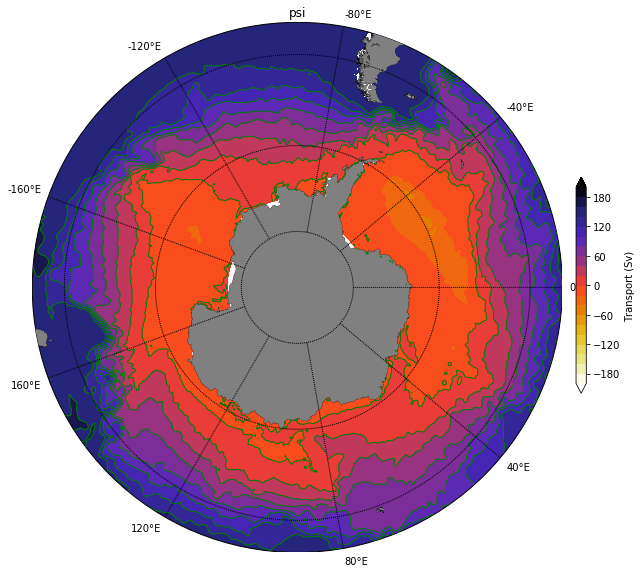

In [10]:
#plot ACC transport
levels = np.linspace(-200,200,21)
print levels

plt.subplot(1,1,1)
map = Basemap(projection='spstere',boundinglat=-45,lon_0=90,resolution='l',round=True)
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='gray')
# draw parallels and meridians.
map.drawparallels(np.arange(-80.,81.,15.))
map.drawmeridians(np.arange(-160.,181.,40.),labels=[True,True,True,True])
X, Y = map(geolon_t,geolat_t) 
p1=map.contourf(X,Y,cntrl_psi, cmap=plt.cm.CMRmap_r, levels=levels, extend='both') #CMRmap_r, gist_stern_r
clev3 = np.arange(0,200,20)
print clev3
map.contour(X,Y,cntrl_psi,levels=clev3,colors='g',linewidths=1)
plt.title('psi')

ax3 = plt.axes([0.92,0.38,0.015,0.25])
cb = plt.colorbar(p1,cax=ax3,orientation='vertical')
cb.ax.set_ylabel('Transport (Sv)')

Text(0.5,1,u'Control')

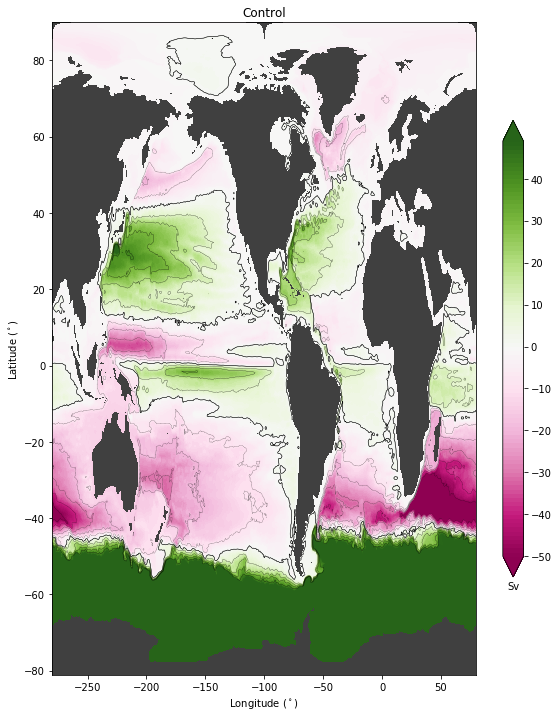

In [11]:
plt.figure(figsize(9.5,12))
x_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)

clev = np.arange(-50,50,1)
clev2 = np.arange(-50,50,10)

t1=26
t2=30
#subtract the DP transport 
plt.gca().patch.set_color('.25')
plt.contourf(geolon_t,geolat_t,-cntrl_psi+cntrl_dp_ts,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical',shrink = 0.7)
cb.ax.set_xlabel('Sv')
plt.contour(geolon_t,geolat_t,-cntrl_psi+cntrl_dp_ts,levels=clev2,colors='k',linewidths=0.25)
plt.contour(geolon_t,geolat_t,-cntrl_psi+cntrl_dp_ts,levels=[0.0,],colors='k',linewidths=0.5)
#plt.gca().invert_yaxis()
#plt.gca().yaxis.set_major_formatter(x_formatter)
#plt.ylim((1037.5,1035))
plt.xlabel('Longitude ($^\circ$)')
plt.ylabel('Latitude ($^\circ$)')
#plt.xlim([-75,85])
plt.title('Control')